In [13]:
from matplotlib import pyplot as plt

import numpy as np

import json

In [14]:
with open('goland_results.json', 'r') as fobj:
    results = json.load(fobj)

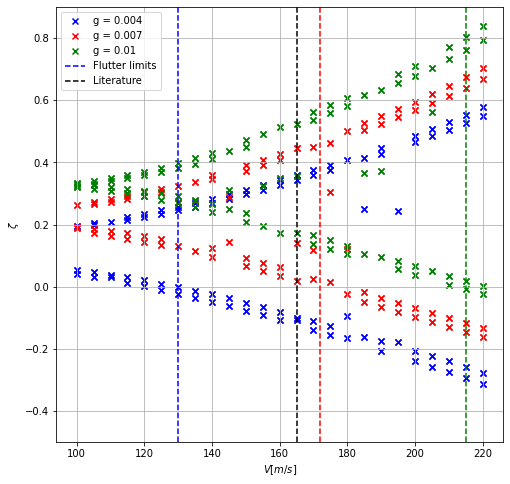

In [15]:
fig = plt.figure(figsize = (8, 8))

ks = [float(k) for k in results.keys()]
ks.sort()
ks = [str(k) for k in ks]

cs = ['b', 'r', 'g']
i = 0

omegas_tot = []
zetas_tot = []

for g in ks:
    gdict = results[g]

    vs = []
    zs = []

    for v, vd in zip(
        gdict.keys(), gdict.values()
    ):
        lrs = np.array(vd["real_parts"])
        irs = np.array(vd["imaginary_parts"])

        omega = np.sqrt(lrs ** 2 + irs ** 2)

        is_valid = omega > 1e-10

        omega = omega[is_valid]
        lrs = lrs[is_valid]

        zeta = - lrs / omega

        """
        omega, inds = np.unique(omega, return_index = True)
        zeta = zeta[inds]

        asrt = np.argsort(zeta)

        omega = omega[asrt[[0, 3]]]
        zeta = zeta[asrt[[0, 3]]]
        """

        vs.extend(
            [float(v)] * len(zeta)
        )
        zs.extend(
            zeta.tolist()
        )

        omegas_tot.extend(omega.tolist())
        zetas_tot.extend(zeta.tolist())

    plt.scatter(vs, zs, marker = 'x', label ='g = %s' % (g,), color = cs[i])
    i += 1

ylims = (-0.5, 0.9)

plt.vlines([130.0, 172.0, 215.0], *ylims, colors = cs + ['k'], label = 'Flutter limits', linestyles = 'dashed')

# reference:
# PALACIOS, Rafael et al. Assessment of Wake-Tail Interference Effects on the Dynamics of Flexible Aircraft.
# AIAA Journal, 50(7):1575-1585, 2021.
plt.vlines(165.0, *ylims, colors = 'k', label = 'Literature', linestyles = 'dashed')

plt.ylim(ylims)

plt.grid()

plt.legend()

plt.xlabel(r"$V [m/s]$")
plt.ylabel(r"$\zeta$")

plt.show()